In [1]:
import pandas as pd
import numpy as np

# Part 1: Joining our data

Our data was obtained through 3 seperate csv files, so we need to join them all together   
We start by reading the in dataframe containing user_id, song_id, and listen counts

In [233]:
filename = 'data/train_triplets.txt'
id_df = pd.read_csv(filename, delimiter='\t',names=['user_id','song_id','count'])
id_df

,user_id,song_id,count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
...,...,...,...
48373581,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUHHHH12AF729E4AF,2
48373582,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUJVIT12A8C1451C1,1
48373583,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUSMXX12AB0185C24,1
48373584,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,3


Read in dataframe linking song_id to song titles

In [231]:
track_file = 'data/unique_tracks.txt'
tracks_df = pd.read_csv(track_file,delimiter='<SEP>',names=['track_id','song_id','artist','song'])
tracks_df

<ipython-input-231-a6871d1b8ef7>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tracks_df = pd.read_csv(track_file,delimiter='<SEP>',names=['track_id','song_id','artist','song'])


,track_id,song_id,artist,song
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
...,...,...,...,...
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday


Now join those two dataframes on the shared song id

In [229]:
df = pd.merge(tracks_df, id_df, how='inner', on='song_id')
df

,track_id,song_id,artist,song,user_id,count
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night,3a05343210b5e4b6308193bcd00242d326bd9b36,1
1,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night,93f24a7eb6742300414e7b8d4fefddf3f90c3db7,6
2,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night,53f8a04762e391eb0efb812b7352e4d598a48b2c,1
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s,baf8f44f7f23ca9671be11ff296df32a09f4406d,1
4,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s,c59ecc2ed2f13812c69a65c02d9847d255fa8ecf,1
...,...,...,...,...,...,...
49664523,TRYYYZM128F428E804,SOBODSE12A8C13EBD6,SKYCLAD,Inequality Street,9ab8ef65e878846e1e2b4e1109ffa56b1a2c09bb,1
49664524,TRYYYZM128F428E804,SOBODSE12A8C13EBD6,SKYCLAD,Inequality Street,56d29a12dbd87b619256e349d967fef6e1a46698,1
49664525,TRYYYON128F932585A,SOWCNSN12AB018070F,Loose Shus,Taurus (Keenhouse Remix),aeb227fce19da4e5a1d88f53df2ac0eb3ede4f74,1
49664526,TRYYYON128F932585A,SOWCNSN12AB018070F,Loose Shus,Taurus (Keenhouse Remix),95061cbe060d2500ce8af2bc71bcd9a6512352ba,2


Now we read in our lyric data

In [424]:
lyric_file = 'data/first1000.csv'

lyric_df = pd.read_csv(lyric_file)
lyric_df['original_index'] = lyric_df.index
# this is needed incase we want to map back to the original index in the lyric table after all the joins
lyric_df

,Band,Lyrics,Song,original_index
0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,1
2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,2
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,3
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,4
...,...,...,...,...
994,Judy Garland,"Day in, day out\r\nThe same old hoodoo follows...","Day In, Day Out",994
995,Judy Garland,When a dove is in love\r\nWith a doll of a dov...,I Could Go on Singin' ('Til the Cows Come Home),995
996,Judy Garland,You've got me where you want me\r\nAnd I hope ...,You Got Me Where You Want Me,996
997,Judy Garland,"If you're ever in a jam, here I am \r\nIf you'...",Friendship (Medley),997


Now we join our data all together by matching on both artist and song name - this helps filter out duplicate song names, and there were many!

In [313]:
df = pd.merge(df, lyric_df, how='inner',left_on=['song','artist'],right_on=['Song','Band'])
df

,track_id,song_id,artist,song,user_id,count,Band,Lyrics,Song,original_index
0,TRMHWSF128F934D22D,SOIBNKE12AB0181BB6,Eliza Doolittle,Go Home,4a6bf06cffacc38b51d598940c06dc35f0685c01,3,Eliza Doolittle,Peepin' out the door\nI see those choppers are...,Go Home,187
1,TRMHWSF128F934D22D,SOIBNKE12AB0181BB6,Eliza Doolittle,Go Home,bbb1f39b74a5974230c4e3343b902f382883175c,2,Eliza Doolittle,Peepin' out the door\nI see those choppers are...,Go Home,187
2,TRMHWSF128F934D22D,SOIBNKE12AB0181BB6,Eliza Doolittle,Go Home,756d56c83ea2003ac3d8e4b30ddc51e02e52e5cf,1,Eliza Doolittle,Peepin' out the door\nI see those choppers are...,Go Home,187
3,TRMHWSF128F934D22D,SOIBNKE12AB0181BB6,Eliza Doolittle,Go Home,63e5f42dd18a5f5b1d2df3fecebe6a5ecfc35a27,4,Eliza Doolittle,Peepin' out the door\nI see those choppers are...,Go Home,187
4,TRMHWSF128F934D22D,SOIBNKE12AB0181BB6,Eliza Doolittle,Go Home,19cdd2de23e456fdfca3f7dc68aa6601765f2db3,1,Eliza Doolittle,Peepin' out the door\nI see those choppers are...,Go Home,187
...,...,...,...,...,...,...,...,...,...,...
4824,TRYIHNA128F934D221,SOZKBKD12AB0181B90,Eliza Doolittle,Moneybox,5e9550f4c7a747283194da37d27a5456e2b6d408,4,Eliza Doolittle,Instead of goin' out\r\nTo dinner tonight\r\nW...,Moneybox,189
4825,TRYIHNA128F934D221,SOZKBKD12AB0181B90,Eliza Doolittle,Moneybox,db8a0ee12ad49667d5f1ae6793672e10b97de7a6,1,Eliza Doolittle,Instead of goin' out\r\nTo dinner tonight\r\nW...,Moneybox,189
4826,TRYIHNA128F934D221,SOZKBKD12AB0181B90,Eliza Doolittle,Moneybox,5e383bf949bc6eee6be0b3db6f08608270352f9b,1,Eliza Doolittle,Instead of goin' out\r\nTo dinner tonight\r\nW...,Moneybox,189
4827,TRYIHNA128F934D221,SOZKBKD12AB0181B90,Eliza Doolittle,Moneybox,5b62dacbf67eb61043206d8c1edda6b65f37f11f,1,Eliza Doolittle,Instead of goin' out\r\nTo dinner tonight\r\nW...,Moneybox,189


In [162]:
print("unique users: ", df['user_id'].unique().size)
print("unique songs: ", df['song_id'].unique().size)

unique users:  2855
unique songs:  34


In [ ]:
unique_df = df.drop_duplicates(subset=['song_id'])
unique_df.song

This step allows us to easily re-index our song id's into an easy to use form. We map song_id -> integer value that can be used to index our matrices

In [314]:
unique_SongID = df['song_id'].unique()
unique_UserID = df['user_id'].unique()
j = 0
user_old2new_id_dict = dict()
for u in unique_UserID:
    user_old2new_id_dict[u] = j
    j += 1
j = 0
song_old2new_id_dict = dict() 
for i in unique_SongID:
    song_old2new_id_dict[i] = j
    j += 1
    
# Then, use the generated dictionaries to reindex UserID and Song in the df
for j in range(len(df)):
    df.at[j, 'user_id'] = user_old2new_id_dict[df.at[j, 'user_id']]
    df.at[j, 'song_id'] = song_old2new_id_dict[df.at[j, 'song_id']]



In [166]:
df

,track_id,song_id,artist,song,user_id,count,Band,Lyrics,Song
0,TRMHWSF128F934D22D,0,Eliza Doolittle,Go Home,0,3,Eliza Doolittle,Peepin' out the door\nI see those choppers are...,Go Home
1,TRMHWSF128F934D22D,0,Eliza Doolittle,Go Home,1,2,Eliza Doolittle,Peepin' out the door\nI see those choppers are...,Go Home
2,TRMHWSF128F934D22D,0,Eliza Doolittle,Go Home,2,1,Eliza Doolittle,Peepin' out the door\nI see those choppers are...,Go Home
3,TRMHWSF128F934D22D,0,Eliza Doolittle,Go Home,3,4,Eliza Doolittle,Peepin' out the door\nI see those choppers are...,Go Home
4,TRMHWSF128F934D22D,0,Eliza Doolittle,Go Home,4,1,Eliza Doolittle,Peepin' out the door\nI see those choppers are...,Go Home
...,...,...,...,...,...,...,...,...,...
4824,TRYIHNA128F934D221,33,Eliza Doolittle,Moneybox,542,4,Eliza Doolittle,Instead of goin' out\r\nTo dinner tonight\r\nW...,Moneybox
4825,TRYIHNA128F934D221,33,Eliza Doolittle,Moneybox,544,1,Eliza Doolittle,Instead of goin' out\r\nTo dinner tonight\r\nW...,Moneybox
4826,TRYIHNA128F934D221,33,Eliza Doolittle,Moneybox,770,1,Eliza Doolittle,Instead of goin' out\r\nTo dinner tonight\r\nW...,Moneybox
4827,TRYIHNA128F934D221,33,Eliza Doolittle,Moneybox,2760,1,Eliza Doolittle,Instead of goin' out\r\nTo dinner tonight\r\nW...,Moneybox


# Part 2: Create Train & Test data

Originally, we wanted the matrices we work with to be of dimension (users, songs), where each entry (u,s) is the number of times the user has listened to that song. However, we realized it is better to fill the matrices with the *fraction* of total listens for that particular user. This way, the model is agnostic of different users listening at differing rates.  

First we sample our df to create our train and test data, and check for overlap


In [270]:
train_df = df.sample(frac=0.7, random_state=0)
test_df = df.drop(train_df.index)

# fill nan values
train_mat[np.isnan(train_mat)] = 0
test_mat[np.isnan(test_mat)] = 0

print(train_df.size)
print(test_df.size)

if(train_df.size + test_df.size == df.size):
    print("no overlap!")


30420
13041
no overlap!


In [410]:
from scipy.sparse import coo_matrix

num_user = len(df['user_id'].unique())
num_song = len(df['song_id'].unique())

train_mat = coo_matrix((train_df['count'].values, (train_df['user_id'].values, train_df['song_id'].values)), shape=(num_user, num_song)).toarray().astype(float)
test_mat = coo_matrix((test_df['count'].values, (test_df['user_id'].values, test_df['song_id'].values)), shape=(num_user, num_song)).toarray().astype(float)

print(train_mat.shape)
print(test_mat.shape)

(2855, 34)
(2855, 34)


Standardize the user counts, so every song listen value becomes a percentage of user listens

In [412]:
train_mat_counts = np.sum(train_mat,axis=1).T
test_mat_counts = np.sum(test_mat,axis=1).T

for user_id in range(num_user):
    
    denom = 1
    if train_mat_counts[user_id] != 0:
        denom = train_mat_counts[user_id]

    train_mat[user_id] = train_mat[user_id]/denom
    test_mat[user_id] = test_mat[user_id]/denom

# Part 3: Model Creation

We will create and validate 3 models - Bag of Words, Bert, and a user-user MF model. All of these models will essentially generate latent features in some way given our (user, song) train data, and then generate predictions for fraction of listens. 

## 3a: Bag of Words

Our simple bag of words model has a few steps:

1. For all lyrics, count the top N most frequent, nontrivial terms
2. For each song, generate an N-length vector containing counts of those terms
3. For each user, generate a user profile songs weighted by listens
4. Produce a prediction for each user-song pair with the product of the user profile and song 

In [413]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import re
from operator import itemgetter
from sklearn.metrics import pairwise


BAG_SIZE = 1000
def get_top_values(d,N = BAG_SIZE):
    return list(sorted(d.items(), key = itemgetter(1), reverse = True)[:N])
stop_words = set(stopwords.words('english')) 

# creating  "master" dictionary
word2count = {}

for song_id in range(num_song):

    # this will get the first index where song_id appears
    lyric_idx = df[df['song_id']==song_id].index.values[0]
    
    # get song lyrics at that index
    song_lyric = df.Lyrics.iloc[lyric_idx]

    # clean song lyrics
    song_lyric = song_lyric.lower()
    song_lyric = re.sub(r'\W', ' ', song_lyric)
    song_lyic = re.sub(r'\s+', ' ', song_lyric)
    song_lyric = re.sub(r'\r|\n', ' ', song_lyric)

    # get word counts for songs omitting stopwords
    words = nltk.word_tokenize(song_lyric)
    for word in words:

        if word not in stop_words:

            if word not in word2count:
                word2count[word] = 1
            else:
                word2count[word] += 1

# get the top ranked words for our songs

word2count_list = get_top_values(word2count)
word2count = dict(word2count_list)
word_ranks = {w2c[0]: r for r, w2c in enumerate(word2count_list)}

# Now pass through again and create vectors

song_counts = np.zeros([num_song, BAG_SIZE])

for song_id in range(num_song):

    lyric_idx = df[df['song_id']==song_id].index.values[0]
    
    # get song lyrics at that index
    song_lyric = df.Lyrics.iloc[lyric_idx]

    # clean song lyrics
    song_lyric = song_lyric.lower()
    song_lyric = re.sub(r'\W', ' ', song_lyric)
    song_lyic = re.sub(r'\s+', ' ', song_lyric)
    song_lyric = re.sub(r'\r|\n', ' ', song_lyric)

    words = nltk.word_tokenize(song_lyric)

    for word in words:
        if word in word_ranks:
            word_idx = word_ranks[word]
            song_counts[song_id][word_idx] += 1

song_pairwise_similarities = pairwise.cosine_similarity(song_counts)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Generate a user profile based on the tastes of each user. This will be a weighted average  
of all the songs the user has listened to, based on relative number of listens

In [ ]:
bow_user_profiles =  np.zeros([num_user, num_bert])

for user_id in range(num_user):

    user_listens = train_mat[user_id]

    for song_id in range(num_song):

        # add song vectors weighted by listens to user profile
        listen_count = train_mat[user_id][song_id]
        bow_user_profiles[user_id] += listen_count*song_counts[song_id]


Create predictions for bag of words by getting the product of user profiles with songs. Ignore users with no listens

In [420]:
bow_prediction_mat = user_profiles @ song_counts.T
bow_prediction_mat_counts = np.sum(bow_prediction_mat,axis=1).T

for user_id in range(num_user):
    
    denom = 1
    if bow_prediction_mat_counts[user_id] != 0:
        denom = bow_prediction_mat_counts[user_id]

    bow_prediction_mat[user_id] = bow_prediction_mat[user_id]/denom

bow_prediction_mat

406


##3b: BERT

Our BERT model is similarly structured, except how we get our latent features

1. Compute latent features for lyrics by feeding into BERT, a pretrained model 
2. For each user, generate a user profile that is weighted by listens. So each user profile should be as long as the latent dimension
3. Produce a prediction for each user-song pair with the product of the user profile and latent representation of the song

First however, we have to read in our document embeddings that we computed earlier and wrote to a file

In [306]:
sample_frac = 1.0
filepath = f"data/lyrec_embeddings_{sample_frac}.pkl.npy"

if os.path.isfile(filepath):
    got_from_file = True
    document_embeddings = np.load(filepath)
else:
    print('no file path')

if not got_from_file:
    np.save(filepath, document_embeddings)   

In [308]:
document_embeddings.shape

(516174, 768)

Now we use the original index to map back to the correct lyrics, since BERT computed many redundant lyric representations

In [318]:

subset_embeddings = document_embeddings[df.original_index]

print(document_embeddings.shape)
print(subset_embeddings.shape)
print(len(np.unique(subset_embeddings, axis=0)))

(516174, 768)
(4829, 768)
34


In [342]:
num_bert = subset_embeddings.shape[1]
bert_factors = np.zeros([num_song, num_bert])

for song_id in range(num_song):

    # get the original index where the first song id appears in the df
    original_idx = df[df['song_id']==song_id].original_index.values[0]
    # get song lyrics at that index
    bert_factors[song_id] = subset_embeddings[original_idx]

bert_factors.shape

(34, 768)

Compute bert user profiles as the weighted average of latent representations of songs, weighted by the listens

In [331]:
bert_user_profiles =  np.zeros([num_user, num_bert])

for user_id in range(num_user):

    user_listens = train_mat[user_id]

    for song_id in range(num_song):

        # add song vectors weighted by listens to user profile
        listen_count = train_mat[user_id][song_id]
        bert_user_profiles[user_id] += listen_count*bert_factors[song_id]

114


Get product of user profiles and song representations for predicted values

In [330]:
bert_prediction_mat = bert_user_profiles @ bert_factors.T
bert_prediction_mat_counts = np.sum(bert_prediction_mat,axis=1).T

for user_id in range(num_user):
    
    denom = 1
    if bert_prediction_mat_counts[user_id] != 0:
        denom = bert_prediction_mat_counts[user_id]

    bert_prediction_mat[user_id] = bert_prediction_mat[user_id]/denom

bert_prediction_mat

2855
24


# Part 3: User-User MF


In [432]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
%matplotlib inline



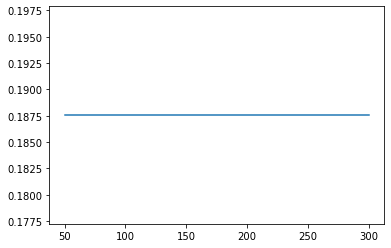

In [433]:
iterations = [50,100,150,200,250,300]
iter_rmse = []
for i in iterations:
    nmf = NMF(max_iter=i)
    W = nmf.fit_transform(train_mat)
    factorization_matrix = nmf.components_
    mf_mat = np.dot(W,factorization_matrix)

    iter_rmse.append(new_rmse(test_mat,mf_mat))

plt.plot(iterations, iter_rmse)
plt.show()

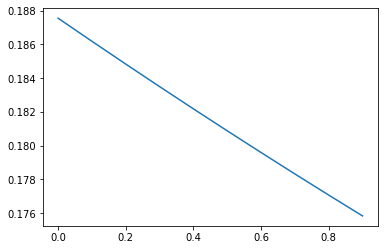

In [439]:
a = [0.1 * i for i in range(10)]
alpha_rmse = []
for i in a:
    nmf = NMF(alpha=i)
    W = nmf.fit_transform(train_mat)
    factorization_matrix = nmf.components_
    mf_mat = np.dot(W,factorization_matrix)

    alpha_rmse.append(new_rmse(test_mat,mf_mat))

plt.plot(a, alpha_rmse)
plt.show()

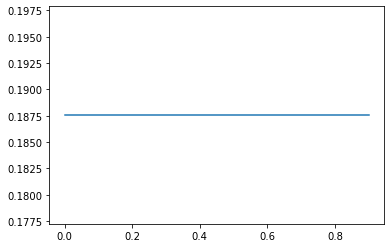

In [440]:
l1_ratio = [0.1 * i for i in range(10)]
l1_rmse = []
for i in a:
    nmf = NMF(l1_ratio=i)
    W = nmf.fit_transform(train_mat)
    factorization_matrix = nmf.components_
    mf_mat = np.dot(W,factorization_matrix)

    l1_rmse.append(new_rmse(test_mat,mf_mat))

plt.plot(l1_ratio, l1_rmse)
plt.show()

Define a new rmse function that ignores users with zero listens

In [422]:
def new_rmse(test_mat,pred_mat):

    total = 0
    n = pred_mat.size
    unrated = 0

    for user_id in range(num_user):

        if np.sum(pred_mat[user_id])==0:
            unrated += num_song
        else:
            total += np.sum(np.square(test_mat[user_id] - pred_mat[user_id]))
    
    return np.sqrt(total/(n-unrated))

In [ ]:
# Tuning our MF model

In [423]:
print('baseline rmse: ', new_rmse(test_mat,np.random.rand(num_user,num_song)))
print('user-user rmse: ', new_rmse(test_mat,mf_mat))
print('bag of words rmse: ', new_rmse(test_mat,bow_prediction_mat))
print('BERT rmse: ', new_rmse(test_mat,bert_prediction_mat))

0.7120218344605813
0.18755203340460716
0.12378539712372252
0.10575903232384942
